In [2]:
pip install opencv-contrib-python

In [3]:
pip install caer

  Using cached caer-1.9.8-py3-none-any.whl (838 kB)
  Using cached typing_extensions-3.10.0.0-py3-none-any.whl (26 kB)
  Using cached mypy_extensions-0.4.3-py2.py3-none-any.whl (4.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numpy

In [18]:
pip install matplotlib

  Using cached matplotlib-3.4.2-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2

In [2]:
cd

C:\Users\matia


In [2]:
img=cv2.imread('C:/Users/matia/Proyectos/patato.jpg')

In [13]:
print(img)

[[[ 35  42  62]
  [ 37  44  64]
  [ 40  47  67]
  ...
  [ 80 166 218]
  [ 82 171 222]
  [ 85 174 225]]

 [[ 39  49  73]
  [ 41  51  75]
  [ 44  54  78]
  ...
  [ 78 162 214]
  [ 78 164 216]
  [ 79 165 217]]

 [[ 41  59  88]
  [ 43  61  90]
  [ 46  64  93]
  ...
  [ 75 155 208]
  [ 76 156 209]
  [ 77 157 210]]

 ...

 [[ 53 145 194]
  [ 44 136 185]
  [ 39 132 181]
  ...
  [ 30  77 131]
  [ 30  77 133]
  [ 27  76 132]]

 [[ 47 139 188]
  [ 37 129 178]
  [ 33 126 175]
  ...
  [ 34  81 135]
  [ 33  80 136]
  [ 31  80 136]]

 [[ 47 139 188]
  [ 37 129 178]
  [ 33 126 175]
  ...
  [ 34  81 135]
  [ 33  80 136]
  [ 31  80 136]]]


In [3]:
cv2.imshow('1',img)
cv2.waitKey(0)

-1

LEO VIDEO

In [ ]:
#lectura de video
capture= cv2.VideoCapture('C:/Users/matia/Proyectos/videogente.mp4')
#leo video
while True:
    isTrue, frame =capture.read() 
    cv2.imshow('video', frame)
    
    if cv2.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()
cv2.destroyAllWindows()

RESCALAR VIDEO

In [3]:
# rescalar video

# difino funcion
def rescaleFrame (frame,scale=0.75):
    width = int(frame.shape[1]+scale)
    height = int(frame.shape[0]+scale)
    dimen = (width, height)
    
    return cv2.resize(frame,dimen, interpolation=cv2.INTER_AREA)

In [4]:
# vuelvo a leer el video
capture= cv2.VideoCapture('C:/Users/matia/Proyectos/videogente.mp4')
#leo video
while True:
    isTrue, frame =capture.read() 
    frame_resize = rescaleFrame(frame)
    
    cv2.imshow('video_rescale', frame_resize)
    cv2.imshow('video', frame)
    
    if cv2.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()
cv2.destroyAllWindows()

CAMBIO DE RESOLUCION



In [ ]:
def changeRes(width, height):
    capture.set(3,width)
    capture.set(4,height)

DIBUJAR Y ESCRIBIR UNA IMAGEN

In [3]:
import cv2
import numpy as np

In [21]:
#imagen vacia
blank =np.zeros((500,500,3), dtype='uint8')

In [3]:
cv2.imshow('blank',blank)
cv2.waitKey()

-1

In [6]:
# pinto de un color
blank[:] = 0,255,0
cv2.imshow('green', blank)
cv2.waitKey()


-1

In [7]:
# figura de otro color
blank[200:300,300:400]= 0,0,255
cv2.imshow('rectengulo',blank)
cv2.waitKey()

-1

In [11]:
#rectangulo
cv2.rectangle(blank, (0,0), (250,250), (0,255,0), -1)
# (imagen base, vertice inicial, vertice final, color, ancho)
# el ancho -1 lo rellena
cv2.imshow('rectangulo', blank)
cv2.waitKey()


-1

In [14]:
#circulo 

cv2.circle(blank, (blank.shape[0]//2,blank.shape[1]//2) , 15 , (0,0,255), -1 )
# (imagenbase,centro, radio, color, grosor)
cv2.imshow('circulo', blank)
cv2.waitKey()

-1

In [17]:
# linea

cv2.line(blank, (0,0), (blank.shape[0]//2,blank.shape[1]//2), (0,0,255), 3 )
# (imagenbase, p_inicio, p_fin, color, grosor)
cv2.imshow('linea', blank)
cv2.waitKey()

-1

In [22]:
# texto 

cv2.putText(blank, 'LA TITI RATA', (120,255), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (255,0,0), 2)
cv2.imshow('text', blank)
cv2.waitKey()

-1

FUNCIONES BASICAS

In [34]:
# imagenes a escala de grises
img=cv2.imread('C:/Users/matia/Proyectos/Opencv/5.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray)
cv2.waitKey(0)

-1

In [27]:
# difuminar imagen
blur = cv2.GaussianBlur(img, (3,3), cv2.BORDER_DEFAULT)
cv2.imshow('blur', blur)
cv2.waitKey(0)

-1

In [73]:
# borde
canny = cv2.Canny(resized, 60, 60)
cv2.imshow('borde', canny)
cv2.waitKey(0)

-1

In [24]:
#resize
resized = cv2.resize(img, (800,500), interpolation=cv2.INTER_CUBIC)
#cv2.imshow('Resized', resized)
#cv2.waitKey(1)

In [37]:
# recorte
cropped = img[50:200, 200:400]
cv2.imshow('recorte', cropped)
cv2.waitKey(0)

-1

TRASFORMACIONES BASICAS

In [2]:
def translate (img, x, y):
    transMat = np.float32([[1,0,x], [0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv2.warpAffine(img, transMat, dimensions)

In [5]:
translated=translate(img,100,100)
cv2.imshow('translated',translated)
cv2.waitKey(0)

-1

In [38]:
# rotar
def rotate(img, angle, rotPoint=None):
    (h,w)=img.shape[:2]
    
    if rotPoint is None:
        rotPoint = (w//2, h//2)
    
    rotMat = cv2.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimension = (w, h)
    
    return cv2.warpAffine(img, rotMat, dimension)


In [39]:
rotated = rotate(img, 45)
cv2.imshow('rotar', rotated)
cv2.waitKey(0)

-1

In [43]:
#resizes
resized = cv2.resize(frame, (500,500), interpolation=cv2.INTER_CUBIC)
#cv2.imshow('resize', resized)
#cv2.waitKey(0)

In [44]:
#flipping
flip =cv2.flip(resized, 1)
cv2.imshow('flip', flip)
cv2.waitKey(0)

-1

CONTORNOS

In [3]:
import cv2

# contraste
img=cv2.imread('C:/Users/matia/Proyectos/Opencv/5.png')
resized = cv2.resize(img, (800,500), interpolation=cv2.INTER_CUBIC)
#
blur = cv2.GaussianBlur(resized, (3,3), cv2.BORDER_DEFAULT)
canny = cv2.Canny(blur, 50, 50)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 60, 200, cv2.THRESH_BINARY)

contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(str(len(contours)) + ' contornos encontrados')

cv2.imshow('a', thresh)
cv2.imshow('c', canny)
cv2.waitKey(0)

1973 contornos encontrados


-1

In [4]:
import numpy as np

In [5]:
blank =np.zeros((500,800,3), dtype='uint8')

In [6]:
# grafico bordes

draw=cv2.drawContours(blank, contours, -1, (255, 255, 255), 1 )
cv2.imshow('a', draw)
cv2.waitKey(0)

-1

COLOR SPACES

In [8]:
# bgh to hsv
resized = cv2.resize(img, (800,500), interpolation=cv2.INTER_CUBIC)
hsv = cv2.cvtColor(resized, cv2.COLOR_BGR2HSV)
cv2.imshow('a', hsv)
cv2.waitKey(0)

-1

In [111]:
# bgh to LAB
lab = cv2.cvtColor(resized, cv2.COLOR_BGR2LAB)
cv2.imshow('a', lab)
cv2.waitKey(0)

-1

COLOR CHANNELS

In [112]:
resized = cv2.resize(img, (800,500), interpolation=cv2.INTER_CUBIC)

b,g,r = cv2.split(resized)

cv2.imshow('blue', b)
cv2.imshow('red', r)
cv2.imshow('green', g)
cv2.waitKey(0)

-1

BLURRING TECHNIQUES

In [113]:
average =cv2.blur(resized, (3,3))
cv2.imshow('blue', average)
cv2.waitKey(0)

-1

In [114]:
gauss = cv2.GaussianBlur(resized, (3,3), 0)
cv2.imshow('blue', gauss)
cv2.waitKey(0)

-1

In [115]:
median = cv2.medianBlur(resized, 3)
cv2.imshow('blue', median)
cv2.waitKey(0)

98

In [12]:
bilateral = cv2.bilateralFilter(resized, 10, 5, 15)
cv2.imshow('blue', bilateral)
cv2.waitKey(0)

-1

BITWISE OPERATIONS

In [1]:
import cv2 as cv
import numpy as np

In [2]:
blank= np.zeros((400,400), dtype='uint8')
rectangle= cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255,  -1)

cv.imshow('rectangulo', rectangle)
cv.imshow('circulo', circle)
cv.waitKey(0)

-1

In [ ]:
# AND

bitwise_and=cv.bitwise_and(rectangle, circle)
cv.imshow('1', bitwise_and)
cv.waitKey(0)

In [ ]:
# OR

bitwise_or=cv.bitwise_or(rectangle, circle)
cv.imshow('1', bitwise_or)
cv.waitKey(0)

In [ ]:
# XOR

bitwise_xor=cv.bitwise_xor(rectangle, circle)
cv.imshow('1', bitwise_xor)
cv.waitKey(0)

In [3]:
# NOT

bitwise_not=cv.bitwise_not(rectangle, circle)
cv.imshow('1', bitwise_not)
cv.waitKey(0)

-1

MASKING: recorta una parte importante de la imagen haciendo and

In [5]:
import cv2 as cv
import numpy as np

In [7]:
img=cv.imread('C:/Users/matia/Proyectos/Opencv/5.png')
rimg = cv.resize(img, (800,500), interpolation=cv.INTER_CUBIC)
blank =np.zeros(rimg.shape[:2],dtype='uint8')


In [11]:
mask= cv.circle(blank, (rimg.shape[1]//2, rimg.shape[0]//2), 100, 255, -1)

In [13]:
masked = cv.bitwise_and(rimg,rimg, mask=mask)

In [14]:
cv.imshow('1',masked)
cv.waitKey(0)

-1

HISTOGRAMS: muestra la distribucion de intensidad de los pixeles

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img=cv.imread('C:/Users/matia/Proyectos/Opencv/5.png')
rimg = cv.resize(img, (800,500), interpolation=cv.INTER_CUBIC)


In [2]:
gray = cv.cvtColor(rimg, cv.COLOR_BGR2GRAY)
cv.imshow('1', gray)
cv.waitKey(0)

-1

In [6]:
gray_hist = cv.calcHist([gray], [0], None, [256], [0,256])

<Figure size 640x480 with 0 Axes>

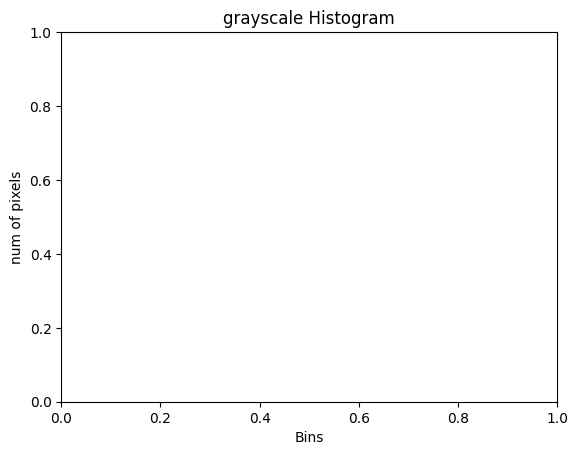

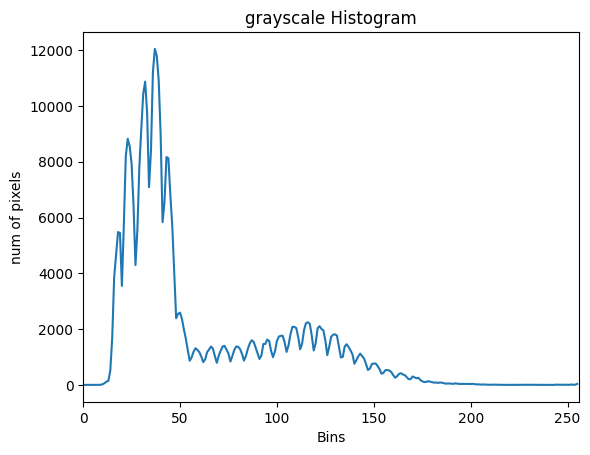

In [7]:
plt.figure()
plt.title('grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('num of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()


In [9]:
blank = np.zeros(rimg.shape[:2], dtype= 'uint8')

In [15]:
circle = cv.circle(blank, (rimg.shape[1]//2, rimg.shape[0]//2), 100, 255, -1)
mask = cv.bitwise_and(gray, gray, mask=circle)
cv.imshow('1', mask)
cv.waitKey(0)

-1

In [11]:
gray_hist = cv.calcHist([gray], [0], mask, [256], [0,256])

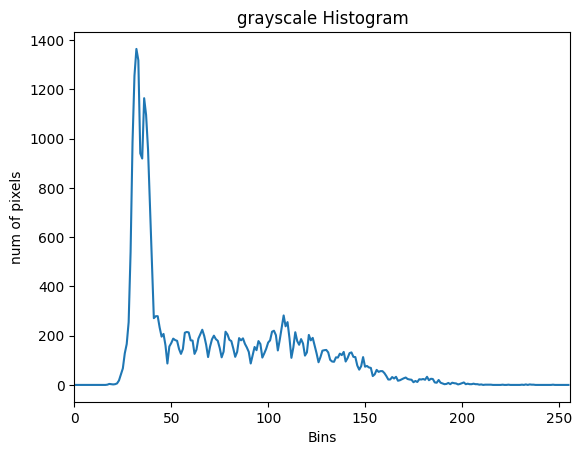

In [14]:
plt.figure()
plt.title('grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('num of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()


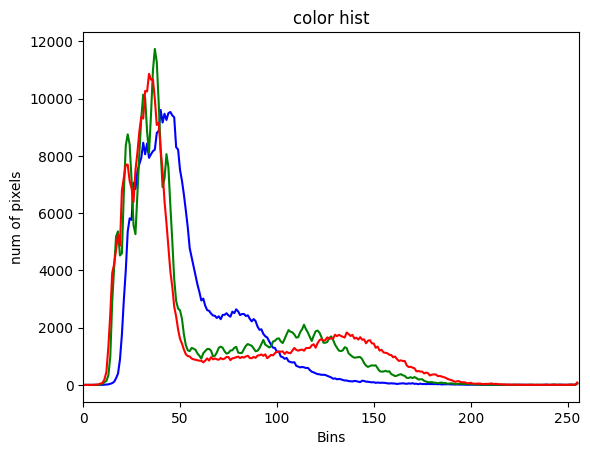

In [16]:
# coor Hist

plt.figure()
plt.title('color hist')
plt.xlabel('Bins')
plt.ylabel('num of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist=cv.calcHist([rimg], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.show()

Thresholding: convierto la img a binario deonde un pixel 0 en negro y 255 es blanco, luego comparo pixeles con umbrales

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img=cv.imread('C:/Users/matia/Proyectos/Opencv/5.png')
rimg = cv.resize(img, (800,500), interpolation = cv.INTER_CUBIC)
gray = cv.cvtColor(rimg, cv.COLOR_BGR2GRAY)
cv.imshow('1', gray)
cv.waitKey(0)

-1

In [9]:
# simple 
threshold, thresh =cv.threshold(gray, 60, 255, cv.THRESH_BINARY)
threshold, thresh_inv =cv.threshold(gray, 60, 255, cv.THRESH_BINARY_INV)

cv.imshow('1',thresh)
cv.imshow('2',thresh_inv)
cv.waitKey(0)

-1

In [6]:
# adaptive
adap_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11 , 5)
cv.imshow('3', adap_thresh)
cv.waitKey(0)

-1

GRADIENTE

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('C:/Users/matia/Proyectos/Opencv/5.png')
rimg = cv.resize(img, (800,500), interpolation = cv.INTER_CUBIC)
gray = cv.cvtColor(rimg, cv.COLOR_BGR2GRAY)
#cv.imshow('1', gray)
#cv.waitKey(0)

In [ ]:
# LAplacian

lap = cv.Laplacian(gray, cv.CV_64F)
lap =np.uint8(np.absolute(lap))
cv.imshow('L', lap)
cv.waitKey(0)

In [2]:
# sobel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
comb_sobel =cv.bitwise_or(sobelx, sobely)

cv.imshow('X', sobelx) # mejor para este caso
cv.imshow('y', sobely)
cv.imshow('C', comb_sobel)
cv.imshow('1', gray)

# canny
canny = cv.Canny(gray, 60,60)
cv.imshow('canny', canny)

cv.waitKey(0)

-1

FACE DETECTION